In [1]:
import networkx as nx
import random
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
sys.path.insert(1, "/home/giga/trips")

from trips_module.domino import DominoRunner
from trips_module.dapcstp import DAPCSTP
from trips_module.assign_scores import *
from trips_module.utils import *
from run_trips import run_trips_one
from plotting import plot_grn_trips

In [2]:
# Set the paths to DAPCSTP and DOMINO
path_to_dapcst = r"/home/giga/dapcstp/solver/"
path_to_domino = r"/home/giga/anaconda3/envs/trips_demo/bin"

In [3]:
# Load the PPI network 
file_ppi = r"/home/giga/trips/data/networks/biogrid_scored.txt"
G_ppi = get_ppi_net(file_ppi)
print("No. of nodes of the PPI network: ", G_ppi.number_of_nodes())
print("No. of nodes of the PPI network: ", G_ppi.number_of_edges())

# Load the GRN
file_grn = r"/home/giga/trips/data/networks/dorothea_AB.txt"
G_grn = get_ppi_net(file_grn)
print("No. of nodes of the GRN: ", G_grn.number_of_nodes())
print("No. of nodes of the GRN: ", G_grn.number_of_edges())

No. of nodes of the PPI network:  15905
No. of nodes of the PPI network:  329043
No. of nodes of the GRN:  5251
No. of nodes of the GRN:  15051


In [4]:
keyword = "dataset1"
main_output_folder = f"/home/giga/trips/results/{keyword}_results"
if not os.path.exists(main_output_folder):
    os.mkdir(main_output_folder)

file_degs = r"/home/giga/TRIPS_DEMO/trips/data/degs/GSE126848_signatureData.csv"

In [5]:
# ------------Run TRIPS------------
lfc_thresh = 1.0
pval_thresh = 0.05

all_modules, G_all = run_trips_one(G_ppi, G_grn, file_degs,
                                   path_to_domino, path_to_dapcst,
                                   main_output_folder, keyword=keyword,
                                   lfc_thresh=lfc_thresh, pval_thresh=pval_thresh)

Parameters:
lfc threshold:  1.0
pval threshold:  0.05
edge cost percentile:  50
Found 2476 DEGs.
===========Running DOMINO===========
start running DOMINO...
network' pkl is loaded: /data2/home/giga/TRIPS_revision/DEMO_FILES/dataset1_results/domino_outputs/domino_ggi.cif.pkl
done building network
fetch cache file for subnetworks /data2/home/giga/TRIPS_revision/DEMO_FILES/dataset1_results/domino_outputs/domino_ggi.dataset1_domino_slices.pkl
pkl is loaded
number of slices: 159
# of slices after perturbation TH: 9/159
9 relevant slices were retained with threshold 0.3
n of putative modules: 9
n of final modules: 8 (n=[36, 15, 20, 10, 18, 15, 14, 7])
8 final modules are reported at /data2/home/giga/TRIPS_revision/DEMO_FILES/dataset1_results/domino_outputs/dataset1_domino_seeds/modules.out
False
Found 8 active modules.
===========Finding PCST solutions===========
Edge cost:  3.27400962220584
len(gene_module) 36
=============================CALCULATING GENE SCORES GENERIC====================

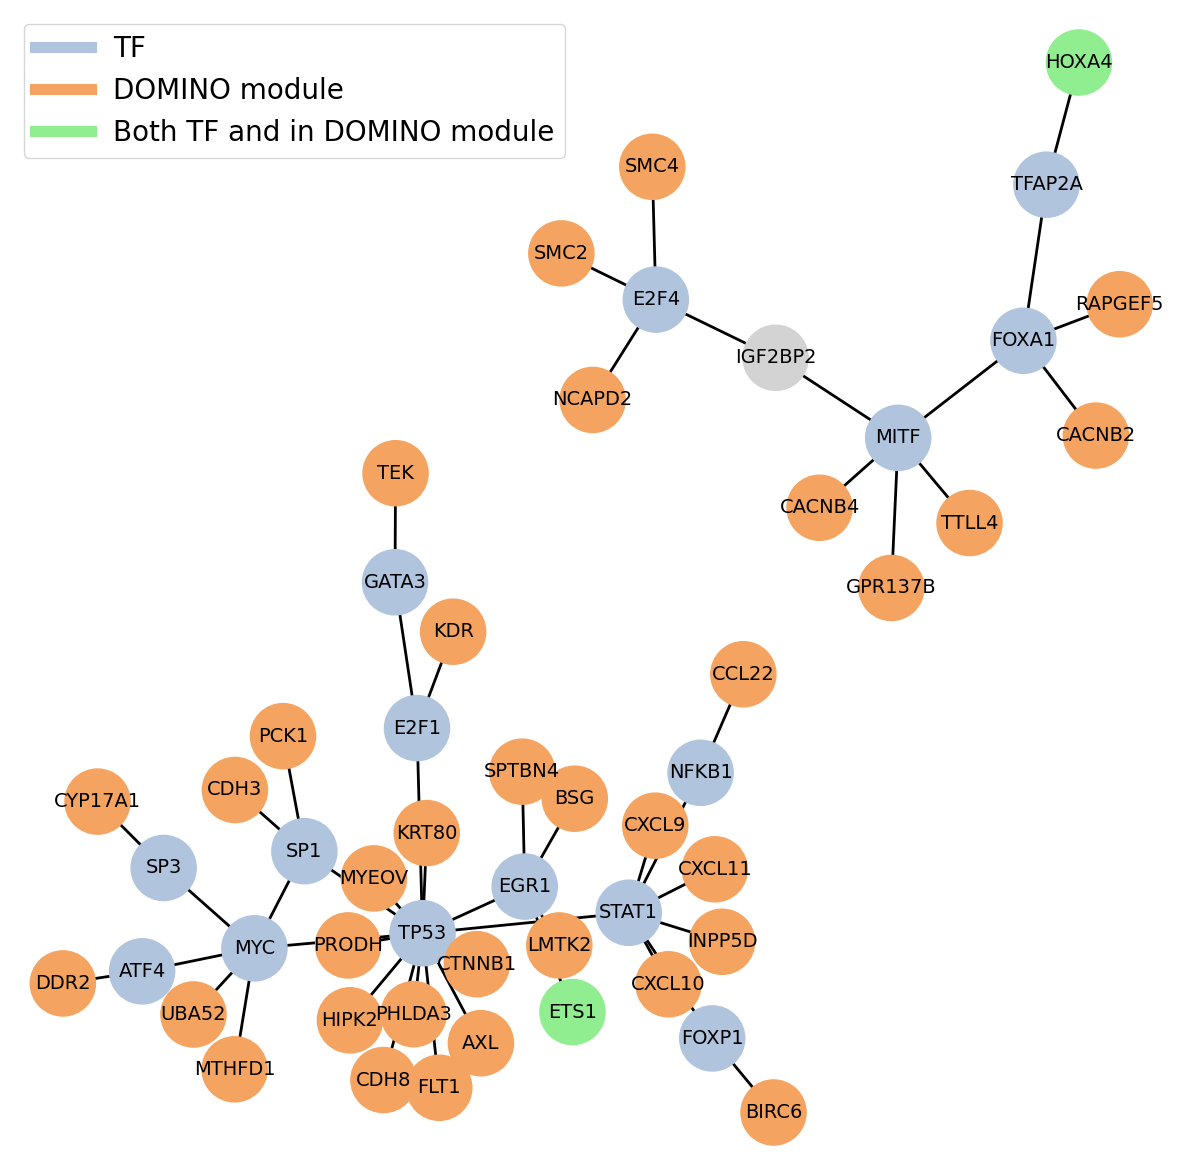

In [7]:
# Load the list of TFs for plotting
with open(r"/home/giga/trips/data/TF_names_v_1.01.txt", 'r') as f:
    all_tfs = [line.rstrip('\n') for line in f]
    
# Flatten the DOMINO output
domino_genes =  [x for xs in all_modules for x in xs]

# Set the node colors
tf_color = "lightsteelblue"
domino_color = "sandybrown"
both_color = "lightgreen"
nodesize = 2200
fontsize = 14

# Plot
file = r"/home/giga/TRIPS_DEMO/trips/results"
plot_grn_trips(G_all, all_tfs=all_tfs, domino_genes=domino_genes, figsize=(15, 15),
              legend_loc="upper left", tf_color=tf_color, domino_color=domino_color, both_color=both_color,
               nodesize=nodesize, fontsize=fontsize,
              filename=file)